<a href="https://colab.research.google.com/github/Struth-Rourke/DS-Unit-2-Kaggle-Challenge/blob/master/module2-random-forests/Assignment_Random_Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 2, Module 2*

---

# Random Forests

## Assignment
- [ ] Read [“Adopting a Hypothesis-Driven Workflow”](https://outline.com/5S5tsB), a blog post by a Lambda DS student about the Tanzania Waterpumps challenge.
- [ ] Continue to participate in our Kaggle challenge.
- [ ] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features.
- [ ] Try Ordinal Encoding.
- [ ] Try a Random Forest Classifier.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.

## Stretch Goals

### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Do more exploratory data analysis, data cleaning, feature engineering, and feature selection.
- [ ] Try other [categorical encodings](https://contrib.scikit-learn.org/categorical-encoding/).
- [ ] Get and plot your feature importances.
- [ ] Make visualizations and share on Slack.

### Reading

Top recommendations in _**bold italic:**_

#### Decision Trees
- A Visual Introduction to Machine Learning, [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/),  and _**[Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)**_
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU)

#### Random Forests
- [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/), Chapter 8: Tree-Based Methods
- [Coloring with Random Forests](http://structuringtheunstructured.blogspot.com/2017/11/coloring-with-random-forests.html)
- _**[Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)**_

#### Categorical encoding for trees
- [Are categorical variables getting lost in your random forests?](https://roamanalytics.com/2016/10/28/are-categorical-variables-getting-lost-in-your-random-forests/)
- [Beyond One-Hot: An Exploration of Categorical Variables](http://www.willmcginnis.com/2015/11/29/beyond-one-hot-an-exploration-of-categorical-variables/)
- _**[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)**_
- _**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)**_
- [Mean (likelihood) encodings: a comprehensive study](https://www.kaggle.com/vprokopev/mean-likelihood-encodings-a-comprehensive-study)
- [The Mechanics of Machine Learning, Chapter 6: Categorically Speaking](https://mlbook.explained.ai/catvars.html)

#### Imposter Syndrome
- [Effort Shock and Reward Shock (How The Karate Kid Ruined The Modern World)](http://www.tempobook.com/2014/07/09/effort-shock-and-reward-shock/)
- [How to manage impostor syndrome in data science](https://towardsdatascience.com/how-to-manage-impostor-syndrome-in-data-science-ad814809f068)
- ["I am not a real data scientist"](https://brohrer.github.io/imposter_syndrome.html)
- _**[Imposter Syndrome in Data Science](https://caitlinhudon.com/2018/01/19/imposter-syndrome-in-data-science/)**_


### More Categorical Encodings

**1.** The article **[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)** mentions 4 encodings:

- **"Categorical Encoding":** This means using the raw categorical values as-is, not encoded. Scikit-learn doesn't support this, but some tree algorithm implementations do. For example, [Catboost](https://catboost.ai/), or R's [rpart](https://cran.r-project.org/web/packages/rpart/index.html) package.
- **Numeric Encoding:** Synonymous with Label Encoding, or "Ordinal" Encoding with random order. We can use [category_encoders.OrdinalEncoder](https://contrib.scikit-learn.org/categorical-encoding/ordinal.html).
- **One-Hot Encoding:** We can use [category_encoders.OneHotEncoder](http://contrib.scikit-learn.org/categorical-encoding/onehot.html).
- **Binary Encoding:** We can use [category_encoders.BinaryEncoder](http://contrib.scikit-learn.org/categorical-encoding/binary.html).


**2.** The short video 
**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)** introduces an interesting idea: use both X _and_ y to encode categoricals.

Category Encoders has multiple implementations of this general concept:

- [CatBoost Encoder](http://contrib.scikit-learn.org/categorical-encoding/catboost.html)
- [James-Stein Encoder](http://contrib.scikit-learn.org/categorical-encoding/jamesstein.html)
- [Leave One Out](http://contrib.scikit-learn.org/categorical-encoding/leaveoneout.html)
- [M-estimate](http://contrib.scikit-learn.org/categorical-encoding/mestimate.html)
- [Target Encoder](http://contrib.scikit-learn.org/categorical-encoding/targetencoder.html)
- [Weight of Evidence](http://contrib.scikit-learn.org/categorical-encoding/woe.html)

Category Encoder's mean encoding implementations work for regression problems or binary classification problems. 

For multi-class classification problems, you will need to temporarily reformulate it as binary classification. For example:

```python
encoder = ce.TargetEncoder(min_samples_leaf=..., smoothing=...) # Both parameters > 1 to avoid overfitting
X_train_encoded = encoder.fit_transform(X_train, y_train=='functional')
X_val_encoded = encoder.transform(X_train, y_val=='functional')
```

For this reason, mean encoding won't work well within pipelines for multi-class classification problems.

**3.** The **[dirty_cat](https://dirty-cat.github.io/stable/)** library has a Target Encoder implementation that works with multi-class classification.

```python
 dirty_cat.TargetEncoder(clf_type='multiclass-clf')
```
It also implements an interesting idea called ["Similarity Encoder" for dirty categories](https://www.slideshare.net/GaelVaroquaux/machine-learning-on-non-curated-data-154905090).

However, it seems like dirty_cat doesn't handle missing values or unknown categories as well as category_encoders does. And you may need to use it with one column at a time, instead of with your whole dataframe.

**4. [Embeddings](https://www.kaggle.com/learn/embeddings)** can work well with sparse / high cardinality categoricals.

_**I hope it’s not too frustrating or confusing that there’s not one “canonical” way to encode categoricals. It’s an active area of research and experimentation! Maybe you can make your own contributions!**_

### Setup

You can work locally (follow the [local setup instructions](https://lambdaschool.github.io/ds/unit2/local/)) or on Colab (run the code cell below).

In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*
    !pip install --upgrade pandas
    !pip install pandas==.25

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [126]:
import graphviz
import pandas as pd
import numpy as np
import plotly.express as px
import category_encoders as ce
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

train, val = train_test_split(train, train_size = 0.80, test_size = 0.20, 
                              stratify = train['status_group'], random_state = 42)

train.shape, val.shape, test.shape

((47520, 41), (11880, 41), (14358, 40))

In [0]:
def wrangle(X):
    """Wrangle train, validate, and test sets in the same way"""
    
    # Prevent SettingWithCopyWarning
    X = X.copy()
    
    # About 3% of the time, latitude has small values near zero,
    # outside Tanzania, so we'll treat these values like zero.
    X['latitude'] = X['latitude'].replace(-2e-08, 0)
    
    # When columns have zeros and shouldn't, they are like null values.
    # So we will replace the zeros with nulls, and impute missing values later.
    # Also create a "missing indicator" column, because the fact that
    # values are missing may be a predictive signal.
    cols_with_zeros = ['longitude', 'latitude', 'construction_year', 
                       'gps_height', 'population']
    for col in cols_with_zeros:
        X[col] = X[col].replace(0, np.nan)
        X[col+'_MISSING'] = X[col].isnull()
            
    # Drop duplicate columns
    duplicates = ['quantity_group', 'payment_type']
    X = X.drop(columns=duplicates)
    
    # Drop recorded_by (never varies) and id (always varies, random)
    unusable_variance = ['recorded_by', 'id']
    X = X.drop(columns=unusable_variance)
    
    # Convert date_recorded to datetime
    X['date_recorded'] = pd.to_datetime(X['date_recorded'], infer_datetime_format=True)
    
    # Extract components from date_recorded, then drop the original column
    X['year_recorded'] = X['date_recorded'].dt.year
    X['month_recorded'] = X['date_recorded'].dt.month
    X['day_recorded'] = X['date_recorded'].dt.day
    X = X.drop(columns='date_recorded')
    
    # Engineer feature: how many years from construction_year to date_recorded
    X['pump_age'] = X['year_recorded'] - X['construction_year']
    X['years_MISSING'] = X['pump_age'].isnull()
    
    # return the wrangled dataframe
    return X

train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

In [128]:
train.head()

,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,longitude_MISSING,latitude_MISSING,construction_year_MISSING,gps_height_MISSING,population_MISSING,year_recorded,month_recorded,day_recorded,pump_age,years_MISSING
43360,0.0,NaN,NaN,NaN,33.542898,-9.174777,Kwa Mzee Noa,0,Lake Nyasa,Mpandapanda,Mbeya,12,4,Rungwe,Kiwira,NaN,True,VWC,K,NaN,NaN,gravity,gravity,gravity,vwc,user-group,never pay,soft,good,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional,False,False,True,True,True,2011,7,27,NaN,True
7263,500.0,Rc Church,2049.0,ACRA,34.665760,-9.308548,Kwa Yasinta Ng'Ande,0,Rufiji,Kitichi,Iringa,11,4,Njombe,Imalinyi,175.0,True,WUA,Tove Mtwango gravity Scheme,True,2008.0,gravity,gravity,gravity,wua,user-group,pay monthly,soft,good,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,False,False,False,False,False,2011,3,23,3.0,False
2486,25.0,Donor,290.0,Do,38.238568,-6.179919,Kwasungwini,0,Wami / Ruvu,Kwedigongo,Pwani,6,1,Bagamoyo,Mbwewe,2300.0,True,VWC,NaN,False,2010.0,india mark ii,india mark ii,handpump,vwc,user-group,pay per bucket,salty,salty,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional,False,False,False,False,False,2011,3,7,1.0,False
313,0.0,Government Of Tanzania,NaN,DWE,30.716727,-1.289055,Kwajovin 2,0,Lake Victoria,Kihanga,Kagera,18,1,Karagwe,Isingiro,NaN,True,NaN,NaN,True,NaN,other,other,other,vwc,user-group,never pay,soft,good,enough,shallow well,shallow well,groundwater,other,other,non functional,False,False,True,True,True,2011,7,31,NaN,True
52726,0.0,Water,NaN,Gove,35.389331,-6.399942,Chama,0,Internal,Mtakuj,Dodoma,1,6,Bahi,Nondwa,NaN,True,VWC,Zeje,True,NaN,mono,mono,motorpump,vwc,user-group,pay per bucket,soft,good,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,functional,False,False,True,True,True,2011,3,10,NaN,True


In [129]:
### New Feature: water_per_person
train['amount_tsh'] = train['amount_tsh'].replace(0, train['amount_tsh'].mean())
val['amount_tsh'] = val['amount_tsh'].replace(0, train['amount_tsh'].mean())
test['amount_tsh'] = test['amount_tsh'].replace(0, test['amount_tsh'].mean())

train['population'] = train['population'].replace(np.NaN, train['population'].median())
val['population'] = val['population'].replace(np.NaN, train['population'].median())
test['population'] = test['population'].replace(np.NaN, test['population'].median())

train['water_per_person'] = train['amount_tsh'] / train['population']
val['water_per_person'] = val['amount_tsh'] / val['population']
test['water_per_person'] = test['amount_tsh'] / test['population']

# Trying to better understand the variables
print('water median', train['amount_tsh'].median())
print('water mean',train['amount_tsh'].mean())
print('\n')

print('pop median', train['population'].median())
print('pop mean', train['population'].mean())


# Water Amounts: 500, 50, 1000, 20, 200, 100
#(2496 + 1970 + 1207 + 1186 + 987 + 665) / 47520 # % of values that are made up of the above amounts
#(2496*(.5) + 1970*(.05) + 1207*(1) + 1186*(.02) + 987*(.2) + 665*(.1)) / 6 #Weighted average of whole with 1000 = 1
#(33265) / 47520 # % of values that are 0

water median 321.92526094276093
water mean 547.2797181239847


pop median 150.0
pop mean 233.67546296296297


In [130]:
target = 'status_group'

# Get a dataframe with all train columns except the target
train_features = train.drop(columns = [target])

# Get a list of the numeric features
numeric_features = train_features.select_dtypes(include = 'number').columns.tolist()

# Get a series with the cardinality of the nonnumeric features
cardinality = train_features.select_dtypes(exclude = 'number').nunique()

# Get a list of all categorical features with cardinality <= 50
categorical_features = cardinality[cardinality <= 50].index.tolist()

# Combine the lists 
features = numeric_features + categorical_features
features

['amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'num_private',
 'region_code',
 'district_code',
 'population',
 'construction_year',
 'year_recorded',
 'month_recorded',
 'day_recorded',
 'pump_age',
 'water_per_person',
 'basin',
 'region',
 'public_meeting',
 'scheme_management',
 'permit',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'water_quality',
 'quality_group',
 'quantity',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group',
 'longitude_MISSING',
 'latitude_MISSING',
 'construction_year_MISSING',
 'gps_height_MISSING',
 'population_MISSING',
 'years_MISSING']

In [131]:
numeric_features

['amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'num_private',
 'region_code',
 'district_code',
 'population',
 'construction_year',
 'year_recorded',
 'month_recorded',
 'day_recorded',
 'pump_age',
 'water_per_person']

In [132]:
cardinality

funder                        1716
installer                     1929
wpt_name                     30661
basin                            9
subvillage                   17231
region                          21
lga                            124
ward                          2082
public_meeting                   2
scheme_management               12
scheme_name                   2563
permit                           2
extraction_type                 18
extraction_type_group           13
extraction_type_class            7
management                      12
management_group                 5
payment                          7
water_quality                    8
quality_group                    6
quantity                         5
source                          10
source_type                      7
source_class                     3
waterpoint_type                  7
waterpoint_type_group            6
longitude_MISSING                2
latitude_MISSING                 2
construction_year_MI

In [133]:
categorical_features

['basin',
 'region',
 'public_meeting',
 'scheme_management',
 'permit',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'water_quality',
 'quality_group',
 'quantity',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group',
 'longitude_MISSING',
 'latitude_MISSING',
 'construction_year_MISSING',
 'gps_height_MISSING',
 'population_MISSING',
 'years_MISSING']

Validation Accuracy: 0.8098484848484848




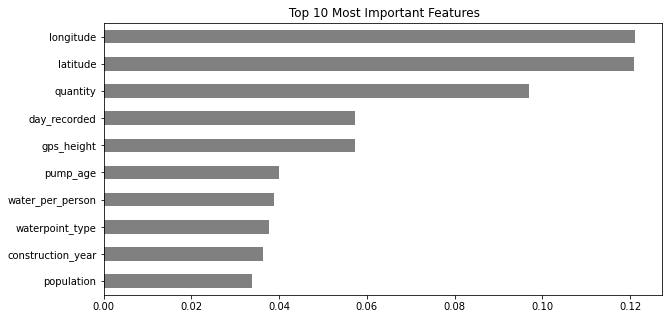

In [134]:
# X Features Matrix
X_train = train[features]
X_val = val[features]
X_test = test[features]

# y target vector
y_train = train[target]
y_val = val[target]

pipeline1 = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(missing_values = np.NaN, strategy = 'median'),
    RandomForestClassifier(max_depth = 30, n_jobs = -1, random_state = 0)
)

pipeline1.fit(X_train, y_train)
print('Validation Accuracy:', pipeline1.score(X_val, y_val))
print('\n')

%matplotlib inline
import matplotlib.pyplot as plt

# Get Feature Importances
rf = pipeline1.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot Top N Features Importances
n = 10
plt.figure(figsize = (10, n/2))
plt.title(f' Top {n} Most Important Features')
importances.sort_values()[-n:].plot.barh(color = 'grey');

#importances.sort_values(ascending = False)

In [135]:
# Features (ONLY Top 10 from above) and Target
target = 'status_group'
features = ['longitude', 'latitude','quantity', 'gps_height', 'day_recorded',
            'construction_year', 'waterpoint_type', 'pump_age', 'water_per_person',
            'population']

# X Features Matrix
X_train = train[features]
X_val = val[features]
X_test = test[features]

# y target vector
y_train = train[target]
y_val = val[target]

pipeline2 = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(missing_values = np.NaN, strategy = 'mean'),
    RandomForestClassifier(max_depth = 25, n_jobs = -1, random_state = 42)
)

pipeline2.fit(X_train, y_train)
print('Validation Accuracy (Pipe2):', pipeline2.score(X_val, y_val))

Validation Accuracy (Pipe2): 0.7955387205387205


Validation Accuracy: 0.7757575757575758




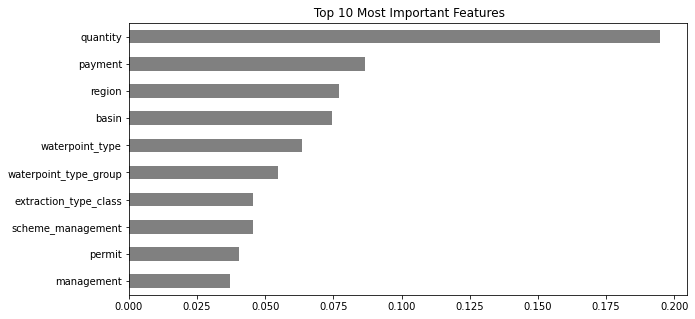

In [136]:
# Features (Categorical Only) and Target
target = 'status_group'
features = ['basin',
 'region',
 'public_meeting',
 'scheme_management',
 'permit',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'water_quality',
 'quality_group',
 'quantity',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group',
 'longitude_MISSING',
 'latitude_MISSING',
 'construction_year_MISSING',
 'gps_height_MISSING',
 'population_MISSING',
 'years_MISSING']

# X Features Matrix
X_train = train[features]
X_val = val[features]
X_test = test[features]

# y target vector
y_train = train[target]
y_val = val[target]

pipeline3 = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(missing_values = np.NaN, strategy = 'mean'),
    RandomForestClassifier(max_depth = 25, n_jobs = -1, random_state = 42)
)

pipeline3.fit(X_train, y_train)
print('Validation Accuracy:', pipeline3.score(X_val, y_val))
print('\n')

%matplotlib inline
import matplotlib.pyplot as plt

# Get Feature Importances
rf = pipeline3.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot Top N Features Importances
n = 10
plt.figure(figsize = (10, n/2))
plt.title(f' Top {n} Most Important Features')
importances.sort_values()[-n:].plot.barh(color = 'grey');

Validation Accuracy: 0.6564814814814814




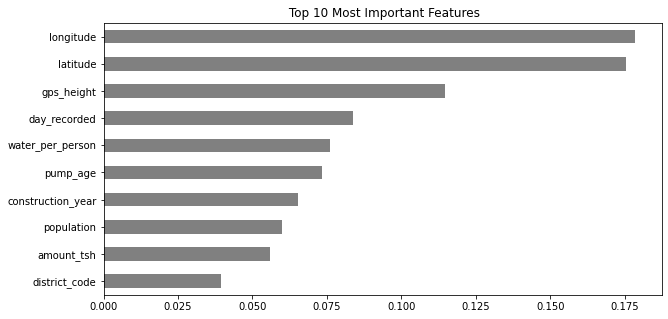

In [137]:
# Features (Numeric Only) and Target
target = 'status_group'
features = ['amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'num_private',
 'region_code',
 'district_code',
 'population',
 'construction_year',
 'year_recorded',
 'month_recorded',
 'day_recorded',
 'pump_age',
 'water_per_person']

# X Features Matrix
X_train = train[features]
X_val = val[features]
X_test = test[features]

# y target vector
y_train = train[target]
y_val = val[target]

pipeline4 = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(missing_values = np.NaN, strategy = 'median'),
    RandomForestClassifier(max_depth = 20, n_jobs = -1, random_state = 42)
)

pipeline4.fit(X_train, y_train)
print('Validation Accuracy:', pipeline4.score(X_val, y_val))
print('\n')

%matplotlib inline
import matplotlib.pyplot as plt

# Get Feature Importances
rf = pipeline4.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot Top N Features Importances
n = 10
plt.figure(figsize = (10, n/2))
plt.title(f' Top {n} Most Important Features')
importances.sort_values()[-n:].plot.barh(color = 'grey');

Validation Accuracy: 0.6485690235690236




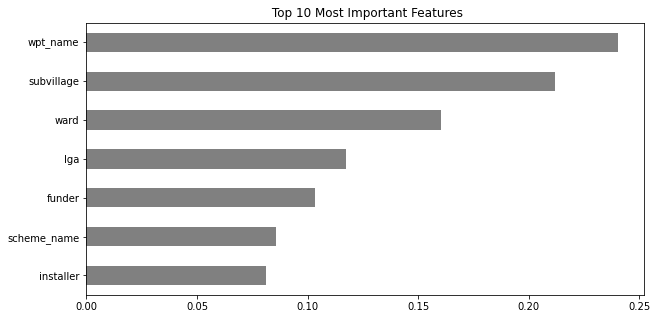

In [138]:
# Features (Cardinality > 50 Only) and Target
target = 'status_group'
features = ['funder', 'installer', 'subvillage', 'lga', 'ward','scheme_name', 'wpt_name']

# X Features Matrix
X_train = train[features]
X_val = val[features]
X_test = test[features]

# y target vector
y_train = train[target]
y_val = val[target]

pipeline5 = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(missing_values = np.NaN, strategy = 'mean'),
    RandomForestClassifier(max_depth = 25, n_jobs = -1, random_state = 42)
)

pipeline5.fit(X_train, y_train)
print('Validation Accuracy:', pipeline5.score(X_val, y_val))
print('\n')

%matplotlib inline
import matplotlib.pyplot as plt

# Get Feature Importances
rf = pipeline5.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot Top N Features Importances
n = 10
plt.figure(figsize = (10, n/2))
plt.title(f' Top {n} Most Important Features')
importances.sort_values()[-n:].plot.barh(color = 'grey');

Validation Accuracy: 0.8105218855218855




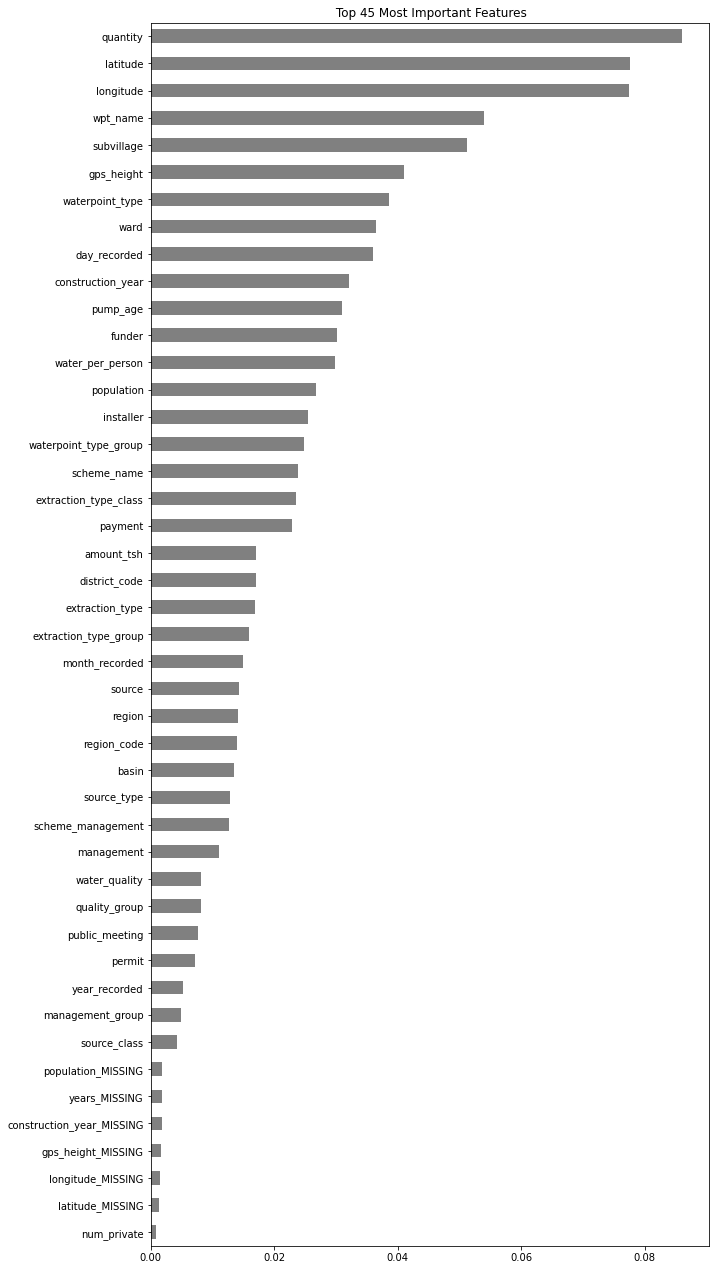

In [139]:
# ALL Features, including cardinality > 50
target = 'status_group'
features = ['amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'num_private',
 'region_code',
 'district_code',
 'population',
 'construction_year',
 'year_recorded',
 'month_recorded',
 'day_recorded',
 'pump_age',
 'water_per_person',
 'basin',
 'region',
 'public_meeting',
 'scheme_management',
 'permit',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'water_quality',
 'quality_group',
 'quantity',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group',
 'longitude_MISSING',
 'latitude_MISSING',
 'construction_year_MISSING',
 'gps_height_MISSING',
 'population_MISSING',
 'years_MISSING',
 'funder',
 'installer',
 'wpt_name',
 'subvillage',
 'ward',
 'scheme_name']

# X Matrix
X_train = train[features]
X_val = val[features]
X_test = test[features]

# y vector
y_train = train[target]
y_val = val[target]

pipeline6 = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy = 'mean'),
    RandomForestClassifier(max_depth = 30, random_state = 0)
)

pipeline6.fit(X_train, y_train)
y_pred_test = pipeline6.predict(X_test)
print('Validation Accuracy:', pipeline6.score(X_val, y_val))
print('\n')

%matplotlib inline
import matplotlib.pyplot as plt

# Get Feature Importances
rf = pipeline6.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot Top N Features Importances
n = len(features)
plt.figure(figsize = (10, n/2))
plt.title(f' Top {n} Most Important Features')
importances.sort_values()[-n:].plot.barh(color = 'grey');

In [0]:
### Formatting submission: Pipeline 6 Attempt
submission = sample_submission.copy()
submission['status_group'] = y_pred_test
submission.to_csv('submission-03.csv', index = False)

In [0]:
from google.colab import files
files.download('submission-03.csv')

Validation Accuracy: 0.7808080808080808




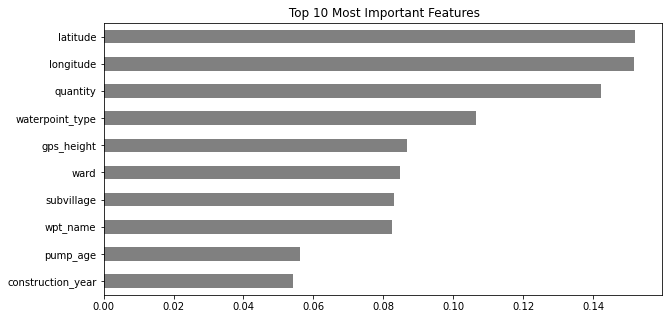

In [143]:
# Top 10 features from above
target = 'status_group'
features = ['quantity', 'longitude', 'latitude', 'waterpoint_type',
            'subvillage', 'wpt_name', 'gps_height', 'pump_age', 'ward',
            'construction_year']

# X Matrix
X_train = train[features]
X_val = val[features]

# y vector
y_train = train[target]
y_val = val[target]

pipeline7 = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy = 'median'),
    RandomForestClassifier(max_depth = 20, random_state = 0)
)

pipeline7.fit(X_train, y_train)
print('Validation Accuracy:', pipeline7.score(X_val, y_val))
print('\n')

%matplotlib inline
import matplotlib.pyplot as plt

# Get Feature Importances
rf = pipeline7.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot Top N Features Importances
n = 10
plt.figure(figsize = (10, n/2))
plt.title(f' Top {n} Most Important Features')
importances.sort_values()[-n:].plot.barh(color = 'grey');

In [144]:
features = ['quantity']

X_train = train[features]

encoder = ce.OneHotEncoder(use_cat_names = True)

X_train_enc = encoder.fit_transform(X_train)
X_train_enc

,quantity_insufficient,quantity_enough,quantity_dry,quantity_seasonal,quantity_unknown
43360,1,0,0,0,0
7263,0,1,0,0,0
2486,1,0,0,0,0
313,0,1,0,0,0
52726,0,1,0,0,0
...,...,...,...,...,...
9795,0,1,0,0,0
58170,0,0,1,0,0
17191,0,1,0,0,0
8192,1,0,0,0,0


In [145]:
## PCA

import numpy as np
from numpy import array
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Define a Matrix
Q = array(X_train_enc)

# Instantiate a Scaler
scaler = StandardScaler()

# Fit / Transform
Z = scaler.fit_transform(Q)

# PCA
pca = PCA(.75) 

# Fit on Z
pca.fit(Z)

# Output Matrix
A = pca.transform(Z)
A

array([[ 1.74613901, -1.13481141, -0.18333022],
       [-1.14242925, -0.16501451, -0.03982621],
       [ 1.74613901, -1.13481141, -0.18333022],
       ...,
       [-1.14242925, -0.16501451, -0.03982621],
       [ 1.74613901, -1.13481141, -0.18333022],
       [-1.14242925, -0.16501451, -0.03982621]])

In [146]:
PCA = pd.DataFrame(data = A)
PCA.shape

(47520, 3)

In [147]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import f_regression, SelectKBest

selector = SelectKBest(score_func = f_regression, k = 15)
encoder = ce.OrdinalEncoder()

# Features and target
target = 'status_group'
features = features = ['amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'num_private',
 'region_code',
 'district_code',
 'population',
 'construction_year',
 'year_recorded',
 'month_recorded',
 'day_recorded',
 'pump_age',
 'water_per_person',
 'basin',
 'region',
 'public_meeting',
 'scheme_management',
 'permit',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'water_quality',
 'quality_group',
 'quantity',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group',
 'longitude_MISSING',
 'latitude_MISSING',
 'construction_year_MISSING',
 'gps_height_MISSING',
 'population_MISSING',
 'years_MISSING',
 'funder',
 'installer',
 'wpt_name',
 'subvillage',
 'ward',
 'scheme_name']

# X Features
X_train = train[features]
X_val = val[features]

# y Target
map_dict = {'functional':1, 'non functional':0, 'functional needs repair':.5}

y_train = train[target]
y_map_train = y_train.map(map_dict)

y_val = val[target]
y_map_val = y_val.map(map_dict)

# OneHotEncoder
X_train_enc = encoder.fit_transform(X_train)
X_train_enc = X_train_enc.fillna(0)
X_val_enc = encoder.fit(X_val)

# Feature Selection via Select KBest
X_train_selected = selector.fit_transform(X_train_enc, y_map_train)

# Shape of new DF
print(X_train_selected.shape)

# Features Selected
all_names = X_train_enc.columns
selected_mask = selector.get_support()
selected_names = all_names[selected_mask]
unselected_names = all_names[~selected_mask]

print('Features Selected:')
for name in selected_names:
  print(name)

print('\n')
print('Features not selected:')
for name in unselected_names:
  print(name)

(47520, 15)
Features Selected:
gps_height
region_code
pump_age
basin
region
scheme_management
extraction_type_class
management
payment
water_quality
quality_group
quantity
waterpoint_type
waterpoint_type_group
ward


Features not selected:
amount_tsh
longitude
latitude
num_private
district_code
population
construction_year
year_recorded
month_recorded
day_recorded
water_per_person
public_meeting
permit
extraction_type
extraction_type_group
management_group
source
source_type
source_class
longitude_MISSING
latitude_MISSING
construction_year_MISSING
gps_height_MISSING
population_MISSING
years_MISSING
funder
installer
wpt_name
subvillage
scheme_name


In [148]:
from sklearn.preprocessing import PolynomialFeatures

target = 'status_group'
features = ['gps_height',
'region_code',
'pump_age',
'basin',
'region',
'scheme_management',
'extraction_type_class',
'management',
'payment',
'water_quality',
'quality_group',
'quantity',
'waterpoint_type',
'waterpoint_type_group',
'ward']

# X Features Matrix
X_train = train[features]
X_val = val[features]

# y target vector
y_train = train[target]
y_val = val[target]

# Pipeline
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy = 'median'),
    PolynomialFeatures(degree = 3, interaction_only = True),
    RandomForestClassifier(max_depth = 30, criterion = 'entropy', n_jobs = -1, random_state = 0)
)

pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.7812289562289563


In [149]:
target = 'status_group'
features = ['quantity',
 'payment',
 'region',
 'basin',
 'waterpoint_type',
 'waterpoint_type_group',
 'extraction_type_class',
 'scheme_management',
 'permit',
 'management', # Categorical from here and above
 'latitude',
 'longitude',
 'construction_year',
 'pump_age',
 'water_per_person',
 'population']

 # X Feature Matrix
X_train = train[features]
X_val = val[features]
X_test = test[features]

 # y target vector
y_train = train[target]
y_val = val[target]

# Pipeline
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy = 'median'),
    RandomForestClassifier(criterion = 'entropy', n_jobs = -1, random_state = 0)
)

pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.7986531986531986
